In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("SALES DATA.csv")

In [3]:
df

,Date,Time,State,Group,Unit,Sales
0,01-Oct-20,Morning,WA,Kids,8,20000
1,01-Oct-20,Morning,WA,Men,8,20000
2,01-Oct-20,Morning,WA,Women,4,10000
3,01-Oct-20,Morning,WA,Seniors,15,37500
4,01-Oct-20,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-20,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-20,Evening,TAS,Kids,15,37500
7557,30-Dec-20,Evening,TAS,Men,15,37500
7558,30-Dec-20,Evening,TAS,Women,11,27500


## Data Wrangling

In [6]:
#checking for missing values and cleaning data
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [15]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


## Data Analysis

In [16]:
#calculate median and mode fro unit and sales column
sales_median = df['Sales'].median()
sales_mode = df['Sales'].mode().iloc[0]

In [17]:
unit_median = df['Unit'].median()
unit_mode = df['Unit'].mode().iloc[0]

In [18]:
sales_median,sales_mode

(35000.0, 22500)

In [19]:
unit_median,unit_mode

(14.0, 9)

In [23]:
#to find sales of differnt groups
grouped_sales = df.groupby('Group')

In [21]:
grouped_sales

In [24]:
total_sales = grouped_sales['Sales'].sum()

In [25]:
total_sales

Group
 Kids       85072500
 Men        85750000
 Seniors    84037500
 Women      85442500
Name: Sales, dtype: int64

In [26]:
max_sales_group = total_sales.idxmax()
max_sales = total_sales[max_sales_group]
print(f"The group with the highest sales is {max_sales_group} with total sales of {max_sales:.2f}")

The group with the highest sales is  Men with total sales of 85750000.00


In [28]:
#to find which state has highest and lowest sales
state_sales = df.groupby('State')['Sales'].sum()

In [29]:
state_sales

State
 NSW     74970000
 NT      22580000
 QLD     33417500
 SA      58857500
 TAS     22760000
 VIC    105565000
 WA      22152500
Name: Sales, dtype: int64

In [30]:
highest_sales_state = state_sales.idxmax()
highest_sales_amount = state_sales[highest_sales_state]

In [34]:
highest_sales_state

' VIC'

In [35]:
lowest_sales_state = state_sales.idxmin()
lowest_sales_amount = state_sales[lowest_sales_state]

In [36]:
lowest_sales_state

' WA'

In [37]:
print(f"The state with the highest sales is {highest_sales_state} with total sales of ${highest_sales_amount:.2f}.")
print(f"The state with the lowest sales is {lowest_sales_state} with total sales of ${lowest_sales_amount:.2f}.")

The state with the highest sales is  VIC with total sales of $105565000.00.
The state with the lowest sales is  WA with total sales of $22152500.00.


## Data Visualisation


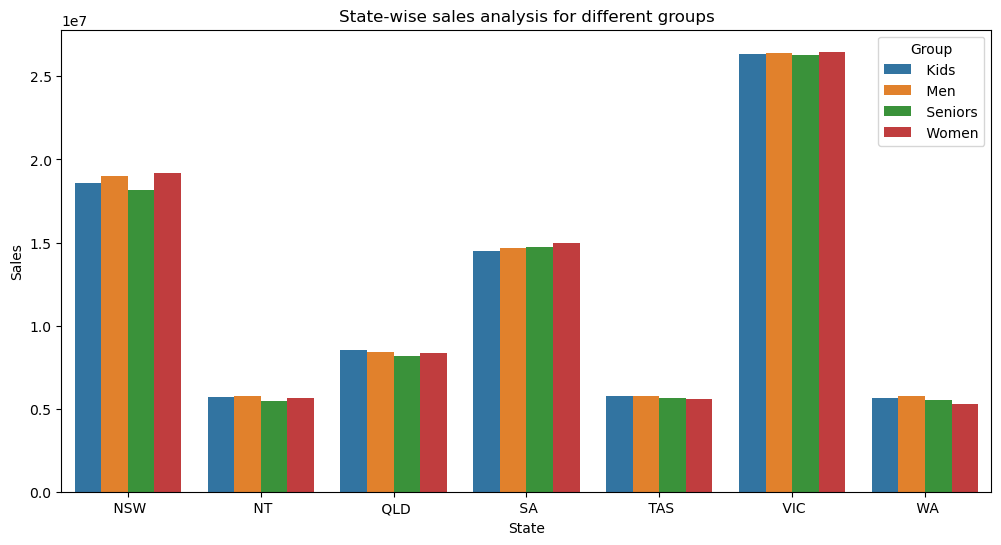

In [38]:
#sate wise sales for different groups
group_state_sales = df.groupby(['Group', 'State']).agg({'Sales': 'sum'}).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=group_state_sales, x='State', y='Sales', hue='Group')
plt.title('State-wise sales analysis for different groups')
plt.xlabel('State')
plt.ylabel('Sales')
plt.show()

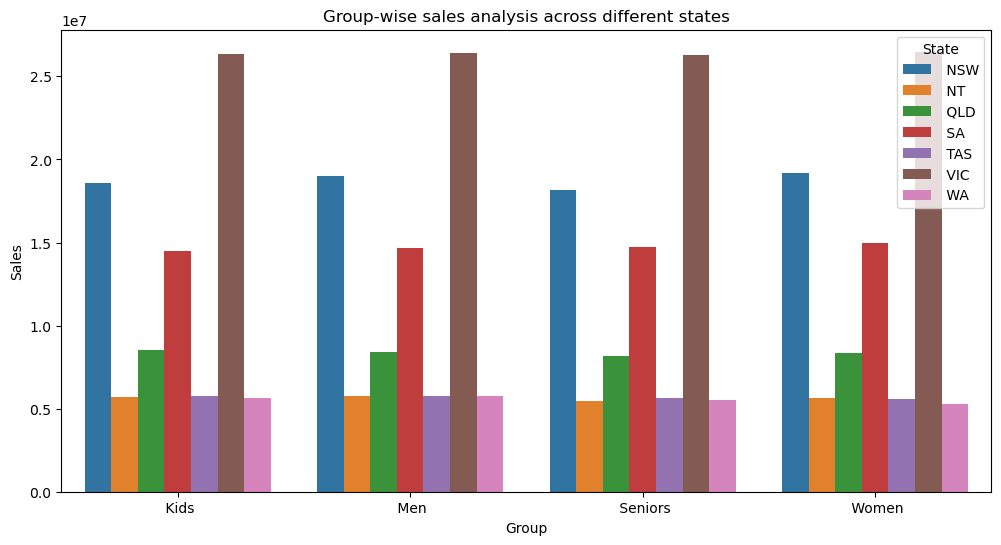

In [40]:
#Group wise sales analyis across different states
state_group_sales = df.groupby(['State', 'Group']).agg({'Sales': 'sum'}).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=state_group_sales, x='Group', y='Sales', hue='State')
plt.title('Group-wise sales analysis across different states')
plt.xlabel('Group')
plt.ylabel('Sales')
plt.show()

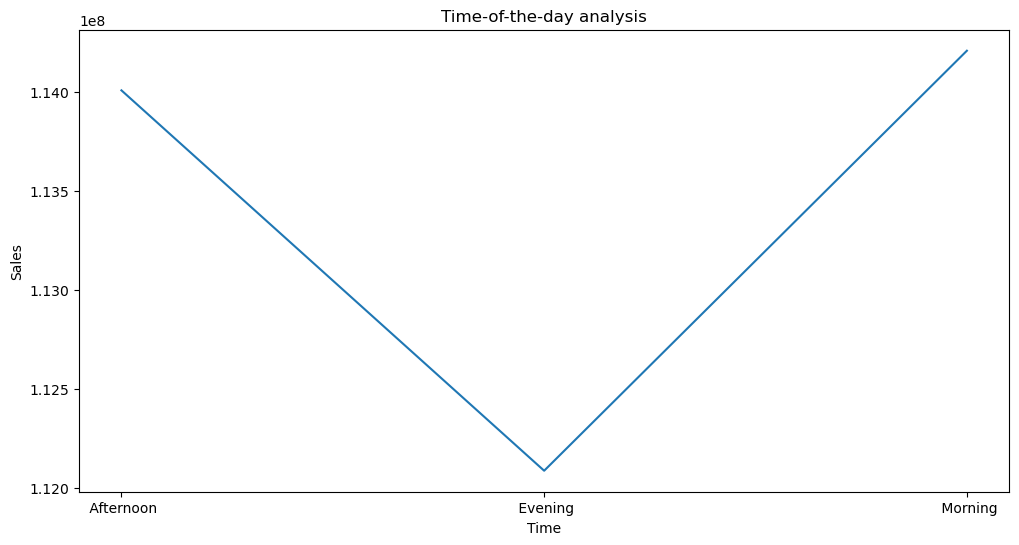

In [43]:
# time of the day analysis determines on which time of the day sales is good
time_sales = df.groupby('Time').agg({'Sales': 'sum'}).reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_sales, x='Time', y='Sales')
plt.title('Time-of-the-day analysis')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()